Name:Pratima Paudel

**Got accuracy= 99 Percent

# Introduction:Digit_Recognizer

This is a model that uses five sequential convolutional layers to recognize digits in the MNIST dataset. It is created using the Keras API with the TensorFlow backend.The first step will be to prepare the handwritten digit images, and then the focus will be on building and evaluating the CNN model.
* ** SOME OF THE STEPS ARE**:

* **Data preparation**:Import all the libraries and Load data,Normalization,Split training and valdiation set

* **CNN**:Define the model,Set the optimizer,Data augmentation

* **Evaluate the model**:Training and validation curves,Confusion matrix

* **Prediction and submition**

# loading all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
np.random.seed(2)
import sklearn
assert sklearn.__version__ >= "0.20"
try:
    %tensorflow_version 2.x
except Exception:
    pass
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')


#  Load data

In [2]:
train = pd.read_csv("C:/Users/pdlpr/Dropbox/Pratima/spring 2023/test.csv")
test = pd.read_csv("C:/Users/pdlpr/Dropbox/Pratima/spring 2023/test.csv")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


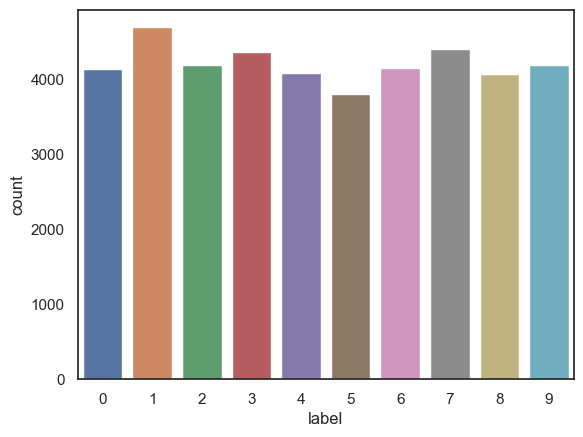

In [3]:
import seaborn as sns
import pandas as pd

train = pd.read_csv("C:/Users/pdlpr/Dropbox/Pratima/spring 2023/train.csv")
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)
del train

g = sns.countplot(Y_train)
print(Y_train.value_counts())

# Check the missing values

In [4]:
print(X_train.isnull().any().describe())

count       784
unique        1
top       False
freq        784
dtype: object


In [5]:
print(test.isnull().any().describe())

count       784
unique        1
top       False
freq        784
dtype: object


Missing vlaues in our data could cause trouble in our model so we need to remove it. From above result we knew that there is no missing values and its safe to go furthermore

#  Normalization

Grayscale normalization is the process of transforming pixel values of grayscale images so that they fall within a standardized range. So We perform a grayscale normalization to reduce the effect of illumination's differences. 
Moreover the CNN converg faster on [0..1] data than on [0..255].

In [6]:
#normalizing the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape

In [7]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

The images used for training and testing were initially stored as 1D vectors of 784 values in pandas.DataFrame. To fit the images into Keras, we needed to reshape them into 28x28x1 3D matrices as Keras requires an additional channel dimension at the end. Since MNIST images are grayscale, only one channel was used. If RGB images were used, three channels would have been needed, resulting in reshaping the 784px vectors to 28x28x3 3D matrices.

# Encoding

In [8]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

# Split training and validation set 

In [9]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

To ensure accurate evaluation during validation, I split the training set into two parts: a small fraction (10%) was reserved for the validation set where the model would be evaluated, and the remaining majority (90%) was used to train the model. 
Since the dataset had a balance of labels among its 42,000 training images, there was no risk of any labels being over-represented in the validation set. However, for unbalanced datasets, a random split could lead to inaccurate evaluation during validation.

# visualising the image
We can get a better sense for one of these examples by visualising the image and looking at the label.

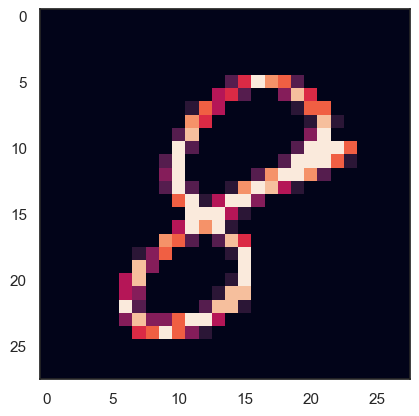

In [10]:
g = plt.imshow(X_train[0][:,:,0])

# Defining  the model by CNN

I have used the Keras Sequential API, which allows for adding one layer at a time, starting from the input.

The model has filters that transform parts of the image. There are 32 filters in the first two Conv2D layers and 64 filters in the last two. MaxPool2D is another important layer that reduces computational load and overfitting by downsampling and selecting the highest pixel value. Careful selection of pooling size is important. CNN combines local and global image features through convolutional and pooling layers.
Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.
The activation function 'relu' adds non-linearity to the network. The Flatten layer converts the final feature maps into a single 1D vector to use in fully connected layers. 
finally,I used two fully connected Dense layers as a classifier, with the last layer's activation function being 'softmax' to output the probability distribution of each class.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Set the optimizer

Once our layers are added to the model, we need to set up a score function, a loss function and an optimization algorithm.

After adding layers to our model, we need to set up a way to evaluate its performance. This includes a loss function, which measures the error rate between predicted and observed labels, and an optimizer function, which improves the model by adjusting its parameters to minimize the loss. For our categorical classification, we use the "categorical_crossentropy" loss function and the RMSprop optimizer, which is very effective. We also use the "accuracy" metric function to evaluate our model's performance.

In [12]:
import seaborn as sns
from tensorflow.keras.optimizers.legacy import RMSprop
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [13]:
# or from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

In [15]:
#compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

To make the optimizer work better and get closer to the best possible results, I used a method to adjust the rate at which it learns. This rate determines how big of a step the optimizer takes towards finding the best results. If the rate is too high, the optimizer may take large steps but could end up missing the best results. To fix this, I decreased the learning rate as the optimizer progressed, making sure to still take big steps when needed. I used a function called ReduceLROnPlateau to decrease the learning rate by half if the optimizer was not making progress after 3 attempts.

# Set a learning rate annealer

In [16]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [17]:
epochs = 30 # set epochs to 30 to get high accuracy
batch_size = 86

# Data augmentation

To avoid overfitting, we can make our handwritten digit dataset larger by artificially expanding it. This means making small changes to the training data to replicate the variations that occur when people write digits, such as off-center writing, different scales, and rotation.

This technique is known as data augmentation, where we modify the training data in ways that don't change the label. There are many ways to augment data, including grayscales, flips, crops, color changes, translations, and rotations. By using a few of these methods on our training data, we can create a more diverse set of examples and build a stronger model.
The improvement : 
   With data augmentation I achieved 99.67% of accuracy

In [18]:
# With data augmentation to prevent overfitting
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

# Once our model is ready, we fit the training dataset.

In [19]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

C:\Users\pdlpr\AppData\Local\Temp\ipykernel_6608\237449075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


Epoch 1/30
439/439 - 239s - loss: 0.5697 - accuracy: 0.8135 - val_loss: 0.0775 - val_accuracy: 0.9786 - lr: 0.0010 - 239s/epoch - 545ms/step
Epoch 2/30
439/439 - 235s - loss: 0.1285 - accuracy: 0.9628 - val_loss: 0.0545 - val_accuracy: 0.9848 - lr: 0.0010 - 235s/epoch - 534ms/step
Epoch 3/30
439/439 - 219s - loss: 0.0898 - accuracy: 0.9744 - val_loss: 0.0372 - val_accuracy: 0.9883 - lr: 0.0010 - 219s/epoch - 499ms/step
Epoch 4/30
439/439 - 216s - loss: 0.0745 - accuracy: 0.9783 - val_loss: 0.0390 - val_accuracy: 0.9883 - lr: 0.0010 - 216s/epoch - 493ms/step
Epoch 5/30
439/439 - 220s - loss: 0.0650 - accuracy: 0.9815 - val_loss: 0.0290 - val_accuracy: 0.9902 - lr: 0.0010 - 220s/epoch - 501ms/step
Epoch 6/30
439/439 - 224s - loss: 0.0605 - accuracy: 0.9832 - val_loss: 0.0423 - val_accuracy: 0.9883 - lr: 0.0010 - 224s/epoch - 510ms/step
Epoch 7/30
439/439 - 752s - loss: 0.0570 - accuracy: 0.9835 - val_loss: 0.0302 - val_accuracy: 0.9914 - lr: 0.0010 - 752s/epoch - 2s/step
Epoch 8/30
439/4

#  Training and validation curves

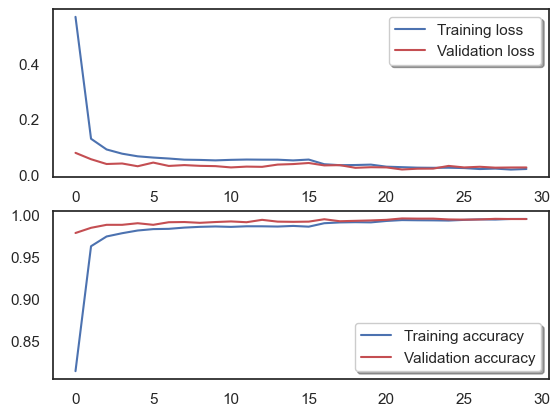

In [20]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend_loss = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend_accuracy = ax[1].legend(loc='best', shadow=True)

The following code is used to create graphs that display the training and validation loss and accuracy. The model was trained with two epochs in this notebook, but I will also show the curves from a model that was trained for 30 epochs (which took approximately 2 and a half hours).The model is trined very well.The model reaches almost 99%.

# Confusion matrix
made Confusion matrix to see our model drawbacks.

132/132 [==============================] - 7s 50ms/step


0.9910080967582109

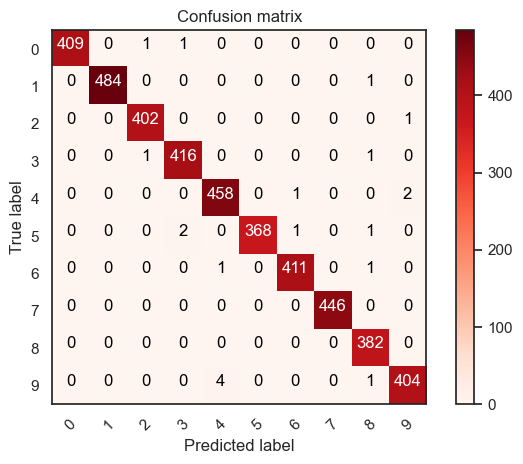

In [34]:
from sklearn.metrics import confusion_matrix, r2_score
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Y_pred = model.predict(X_val) 
Y_pred_classes = np.argmax(Y_pred, axis=1) 
Y_true = np.argmax(Y_val, axis=1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plot_confusion_matrix(confusion_mtx, classes=range(10), cmap=plt.cm.Reds) 

# calculate r2 score
r2_score(Y_val, Y_pred)



We can observe that our convolutional neural network (CNN) performs impressively well in recognizing all digits, with only a few errors considering the size of the validation set (4,200 images).

Nonetheless, there appear to be some minor issues with how the CNN recognizes the digit 4, as it is occasionally misclassified as 9. This can be particularly challenging to distinguish between the two digits when their shapes are similar and the curves in the data are smooth.

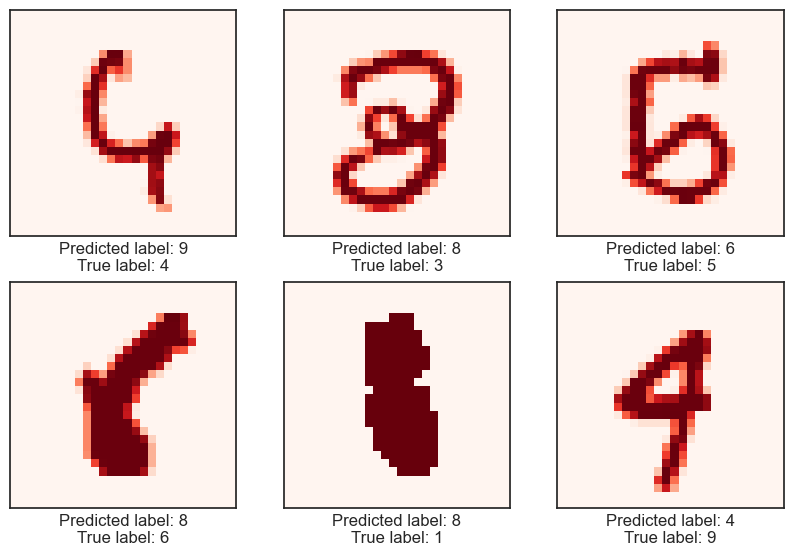

In [30]:
errors = Y_pred_classes != Y_true
X_val_errors, Y_pred_classes_errors, Y_true_errors = X_val[errors], Y_pred_classes[errors], Y_true[errors]
Y_pred_errors_prob = np.max(Y_pred[errors], axis=1)
true_prob_errors = Y_pred[errors, Y_true_errors]
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
most_important_top6_errors = np.argsort(delta_pred_true_errors)[-6:]
plt.figure(figsize=(10, 10))
for i, error_index in enumerate(most_important_top6_errors):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val_errors[error_index].reshape(28, 28), cmap='Reds')
    plt.xlabel("Predicted label: {}\nTrue label: {}".format(Y_pred_classes_errors[error_index], Y_true_errors[error_index]))
plt.show()

# The following scenario pertains to when the epochs configuration is set to 1.

In [31]:
results = pd.Series(np.argmax(model.predict(test), axis=1), name="Label")

875/875 [==============================] - 41s 47ms/step


In [32]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)